<a href="https://colab.research.google.com/github/airpods69/DeepLearning/blob/main/GenderDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torch.optim import SGD

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import matplotlib.pyplot as plt

import time
import os

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # For device selection

In [ ]:
transforms_train = transforms.Compose([
                                       transforms.Resize((224, 224)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transforms_val = transforms.Compose([
                                       transforms.Resize((224, 224)),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
%%capture
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EdWfjq2Cu49Bv6xnZ4FHeswBZSrbikXZqPdLrP8pFhwfQQ?download=1 -O gender_classification_dataset.zip
!unzip gender_classification_dataset.zip -d ./gender_classification_dataset

In [ ]:
data_dir = './gender_classification_dataset'

train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'Training'), transforms_train)
val_datasets = datasets.ImageFolder(os.path.join(data_dir, 'Validation'), transforms_val)

train_dataloader = torch.utils.data.DataLoader(train_datasets, 
                                               batch_size = 16,
                                               shuffle = True,
                                               num_workers = 2)

val_dataloader = torch.utils.data.DataLoader(val_datasets, 
                                               batch_size = 16,
                                               shuffle = True,
                                               num_workers = 2)

In [ ]:
class_names = train_datasets.classes
print('Class names:', class_names)

Class names: ['female', 'male']


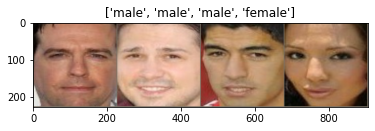

In [ ]:
def imshow(input, title):
    # torch.Tensor => numpy
    input = input.numpy().transpose((1, 2, 0))
    # undo image normalization
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # display images
    plt.imshow(input)
    plt.title(title)
    plt.show()


# load a batch of train image
iterator = iter(train_dataloader)

# visualize a batch of train image
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs[:4])
imshow(out, title=[class_names[x] for x in classes[:4]])

In [ ]:
model = models.resnet18(pretrained = True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr = 0.001, momentum = 0.9)

In [ ]:
num_epochs = 10
start_time = time.time()

for epoch in range(num_epochs):
    """ Training Phase """
    model.train()

    running_loss = 0.
    running_corrects = 0

    # load a batch data of images
    for i, (inputs, labels) in enumerate(train_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward inputs and get output
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # get loss value and update the network weights
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.
    print('[Train #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

    """ Validation Phase """
    model.eval()

    with torch.no_grad():
        running_loss = 0.
        running_corrects = 0

        for inputs, labels in val_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(val_datasets)
        epoch_acc = running_corrects / len(val_datasets) * 100.
        print('[Validation #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

[Train #0] Loss: 0.1423 Acc: 94.7670% Time: 177.0526s
[Validation #0] Loss: 0.0696 Acc: 97.3732% Time: 202.6256s
[Train #1] Loss: 0.0885 Acc: 96.9197% Time: 375.8975s
[Validation #1] Loss: 0.0731 Acc: 97.1070% Time: 401.4531s
[Train #2] Loss: 0.0707 Acc: 97.5218% Time: 574.0123s
[Validation #2] Loss: 0.0692 Acc: 97.4676% Time: 600.7804s
[Train #3] Loss: 0.0581 Acc: 97.9770% Time: 773.0497s
[Validation #3] Loss: 0.0656 Acc: 97.6736% Time: 798.5087s
[Train #4] Loss: 0.0509 Acc: 98.2301% Time: 971.3521s
[Validation #4] Loss: 0.0705 Acc: 97.4848% Time: 997.0817s
[Train #5] Loss: 0.0383 Acc: 98.6088% Time: 1169.1826s
[Validation #5] Loss: 0.0801 Acc: 97.1671% Time: 1195.8424s
[Train #6] Loss: 0.0307 Acc: 98.9194% Time: 1367.6032s
[Validation #6] Loss: 0.0881 Acc: 96.9439% Time: 1393.0667s
[Train #7] Loss: 0.0260 Acc: 99.0810% Time: 1565.4688s
[Validation #7] Loss: 0.0908 Acc: 97.3818% Time: 1590.8085s
[Train #8] Loss: 0.0267 Acc: 99.0768% Time: 1762.9563s
[Validation #8] Loss: 0.0884 Acc: 9

In [ ]:
save_path = 'FaceGenderDetectionModel.pth'
torch.save(model.state_dict(), save_path)

In [ ]:
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2) # binary classification (num_of_class == 2)
model.load_state_dict(torch.load(save_path))
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch
from PIL import Image
import torchvision.transforms as transforms

# Read the image
image = Image.open('/content/000171.jpg')

# Define a transform to convert the image to tensor
transform = transforms.Resize((224, 224))
image = transform(image)


transform = transforms.ToTensor()
image = transform(image)

transform = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
image = transform(image)

In [ ]:
image = image.unsqueeze(0)

In [ ]:
image.shape

torch.Size([1, 3, 224, 224])

In [ ]:
model.eval()

image = image.to(device)
outputs = model(image)
_, preds = torch.max(outputs, 1)
print([class_names[x] for x in preds[:1]])

['male']


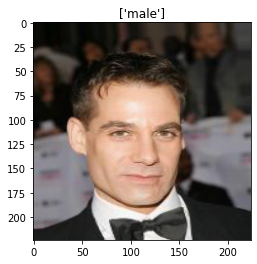

In [ ]:
images = torchvision.utils.make_grid(image)
imshow(images.cpu(), title=[class_names[x] for x in preds[:1]])